In [941]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import math

In [942]:
def run_md(N_atoms, r, T, m, size, num_steps, dump, dt):
    """
    MD program using velocity verlet algorithm
    N_atoms = number_of_atoms
    f = force_of_particles
    r = distance_between_particles
    T = Boltzmann_temperature
    m = mass_of_particle
    size = size_of_the_box
    num_steps = number_of_steps
    dump = frequency_in_steps
    dt = time_step
    """
    
    # initialize positions
    positions = initialize_positions(N_atoms, size)
    
    # initialize velocities
    velocities = initialize_velocities(m, kB, T)
    
    # Main MD loop
     # open trajectory file
    traj_file = open("traj_MD.xyz", 'w')
    for steps in range(num_steps):
    
        # Propagate Positions
        update_positions(positions, velocities, f, dt, size)
        
        # Propagate Velocities
        update_velocities(velocities, f, dt)
        
        if (step%dump==0):
            write_trajectory_frame(positions, traj_file, step)
    
        # close trajectory file
        traj_file.close()
        return traj_file

In [943]:
#################Sub-Routines#################

# initialize positions
def initialize_positions(N_atoms, size):
    
    return np.random.rand(N_atoms, 3) * size

In [944]:
positions = initialize_positions(3, 10)
print(positions)

[[4.58603962 7.24167637 3.99025322]
 [9.04044393 6.9002502  6.99622054]
 [3.27720402 7.56778643 6.36061055]]


In [945]:
def compute_forces(positions, f, size):
    """Compute forces"""
    N = 3 
    size = 10
    for i in range(N):
        for j in range(i + 1, N):
            r_ij = positions[i] - positions[j]
            r = np.linalg.norm(r_ij)
            f = 24 * (2 * (r_ij / r)**12 - (r_ij / r)**6) / r
    return f, r_ij, r

In [947]:
N = 3
N_atoms = 3
size = 10
position = np.random.rand(N_atoms, 3) * size
r_ij = np.zeros((N,N))
for i in range(N):
    for j in range(i + 1, 3):
        r_ij[i, j] = np.linalg.norm(positions[i] - positions[j])
    print(r_ij)

[[0.         5.38461969 2.72726829]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[0.         5.38461969 2.72726829]
 [0.         0.         5.83648344]
 [0.         0.         0.        ]]
[[0.         5.38461969 2.72726829]
 [0.         0.         5.83648344]
 [0.         0.         0.        ]]


In [948]:
r = np.linalg.norm(r_ij)
print(r)

8.396228941481144


In [949]:
f = 24 * (2 * (r_ij / r)**12 - (r_ij / r)**6) / r
print(f)

[[ 0.         -0.17119208 -0.0033494 ]
 [ 0.          0.         -0.24972797]
 [ 0.          0.          0.        ]]


In [950]:
# initialize velocities
def initialize_velocities(m, kB, T):
    """
    kB = boltzmann_temp
    """
    velocities = np.random.normal(loc=0, scale=1, size=(N,3)) * np.sqrt(kB*T/m)
    return velocities

In [951]:
kB = 0.08314
T = 300
m = 16
velocities = np.random.normal(loc=0, scale=np.sqrt(T), size=(N, 3))
print(velocities)

[[-13.99698066 -12.45190284  -9.93407212]
 [ -6.6454838    5.05124975   1.26191996]
 [ -0.32136895   1.7326966    7.41457957]]


In [952]:
# Propagate Positions
def update_positions(positions, velocities, dt, f, size):
    """
    positions = particle_positions
    velocities = particle_velocities
    dt = time_step
    f = force
    size = size_of_box
    """
    positions += velocities * dt + 0.5 * f * dt**2
    
     # wrap into central box (box is from 0 to size in each dimension)
    for i in range(N):
        for j in range(N):
            if positions[i,j] < 0:
                positions[i,j] += size
            elif positions[i,j] > size:
                positions[i,j] -= size
    return positions

In [953]:
dt = 0.001
size = 10
f = 24 * (2 * (r_ij / r)**12 - (r_ij / r)**6) / r
positions += velocities * dt + 0.5 * f * dt**2

In [954]:
print(positions)

[[4.57204264 7.22922438 3.98031914]
 [9.03379845 6.90530145 6.99748234]
 [3.27688265 7.56951912 6.36802513]]


In [955]:
# Propagate Velocities
def update_velocities(velocities, f, dt):
    """
    velocities = particle_velocities
    f = forces
    dt = time_step
    
    """
    velocities += f * dt
    return velocities

In [956]:
dt = 3
f = np.zeros_like(positions)
velocities += f * dt
print(velocities)

[[-13.99698066 -12.45190284  -9.93407212]
 [ -6.6454838    5.05124975   1.26191996]
 [ -0.32136895   1.7326966    7.41457957]]


In [957]:
# Compute Energy
def kinetic_energy(N_atoms, kB, T):
    """kB - Boltzmann constant"""
    
    Energy = 1.5*N_atoms*kB*T
    return Energy

In [958]:
N_atoms = 3
kB = 0.08314
T = 300
Energy = 1.5*N_atoms*kB*T
print(Energy)

112.239


In [959]:
# Trajectory frame        
def write_trajectory_frame(positions, file_pointer, num_steps):
    """
    positions = particle_positions
    file_pointer = trajectory_file_pointer
    num_steps = step_number
    """
    
    N_atoms = positions.shape[0]
    
    file_pointer.write("%10d\n" % (N_atoms))
    file_pointer.write("%10d\n" % (num_steps))
    for i in range(N):
        file_pointer.write("C %10.5f %10.5f %10.5f\n" % ( positions[i,0],  positions[i,1],  positions[i,2]))

In [1375]:
#test sim
N_atoms = 3
r = 11.109807087416717
T = 300
m = 16
size = 10
num_steps = 100
dump = 10
dt = 0.001
sim = run_md(N_atoms, r, T, m, size, num_steps, dump, dt)

In [1376]:
print(sim)

<_io.TextIOWrapper name='traj_MD.xyz' mode='w' encoding='UTF-8'>


In [1377]:
print(traj_file)

<_io.TextIOWrapper name='traj_MD.xyz' mode='w' encoding='UTF-8'>


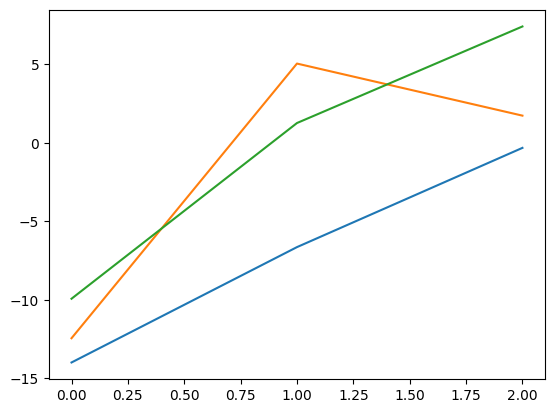

In [963]:
plt.plot(velocities)

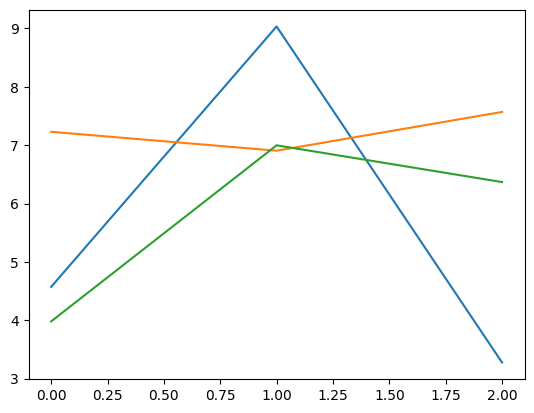

In [964]:
plt.plot(positions)

In [1378]:
import MDAnalysis as mda


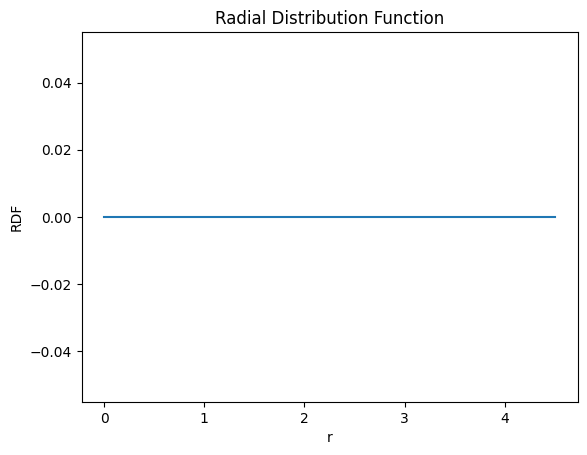

In [1513]:
# Read positions from a file or generate them
traj_file = open("traj_MD.xyz", 'w')

def compute_rdf(ositions, box_length, dr, num_particles, num_bins):
    num_bins = int(size / (2 * dr))
    rdf = np.zeros(num_bins)
    
    volume = size ** 3
    rho = N_atoms / volume
    for i in range(N_atoms - 1):
        for j in range(i + 1, N_atoms):
            rij = positions[i] - positions[j]
            r = np.linalg.norm(rij)
    
    volume = 4 / 3 * np.pi * (np.power((np.arange(num_bins) + 1) * dr, 3) - np.power(np.arange(num_bins) * dr, 3))
    normalization = 2 * np.pi * rho * volume * N_atoms / (N_atoms - 1)

    rdf /= normalization

    return rdf
# Simulation parameters
N_atoms = 10
size = 10.0
num_bins = 10
dr = size / (2 * num_bins)

# Compute RDF
rdf = compute_rdf(positions, size, dr, N_atoms, num_bins)

# Plot RDF
r = np.arange(num_bins) * dr
plt.plot(r, rdf)
plt.xlabel('r')
plt.ylabel('RDF')
plt.title('Radial Distribution Function')
plt.show()